## Sect7. Learning rate, Evaluation

In [1]:
from IPython.display import Image 
from tqdm import tqdm_notebook

### learning_rate 에 따른 학습
- Case1 : learning_rate = 0.1
- Case2 : learning_rate = 1.5
- Case3 : learning_rate = 1e-5

### Case1 : learning_rate = 0.1 

In [2]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 21:51:09.999814 14776 deprecation.py:323] From <ipython-input-2-5ec3f4625285>:32: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


In [3]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 5.732029914855957 
 Weight : 
[[ 0.7288166   0.7153621  -1.1801533 ]
 [-0.5775373  -0.1298833   1.6072978 ]
 [ 0.48373488 -0.51433605 -2.02127   ]]

 Step : 20 
 Cost : 1.6610023975372314 
 Weight : 
[[ 0.35837558  0.7006911  -0.79504126]
 [-0.52181023 -0.14752221  1.5692097 ]
 [-0.00524237 -0.21694617 -1.8296825 ]]

 Step : 40 
 Cost : 1.4070581197738647 
 Weight : 
[[ 0.08632909  0.6441535  -0.4664571 ]
 [-0.27831438 -0.19541699  1.3736087 ]
 [-0.1410587  -0.16434793 -1.7464643 ]]

 Step : 60 
 Cost : 1.2188071012496948 
 Weight : 
[[-0.14574492  0.5804331  -0.17066267]
 [-0.1107574  -0.17286864  1.1835035 ]
 [-0.22450283 -0.17601462 -1.6513534 ]]

 Step : 80 
 Cost : 1.071008563041687 
 Weight : 
[[-0.3455095   0.51687735  0.09265766]
 [ 0.01382142 -0.11677314  1.0028291 ]
 [-0.28096488 -0.21812554 -1.5527804 ]]

 Step : 100 
 Cost : 0.9537602663040161 
 Weight : 
[[-0.52009284  0.45806164  0.3260568 ]
 [ 0.11236382 -0.04872458  0.836238  ]
 [-0.3214388  -0.27116

### Case2 : learning_rate = 1.5 

In [4]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [5]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 4.536120414733887 
 Weight : 
[[-1.9139316   1.1026288   1.794597  ]
 [-1.9765704   3.0702064   0.45361483]
 [-4.111822    1.2449876   0.32312405]]

 Step : 1 
 Cost : 22.07525634765625 
 Weight : 
[[-1.5389316   0.16525811  2.3569677 ]
 [ 0.46092963 -0.86703086  1.953352  ]
 [-1.6743221  -2.5048656   1.6354772 ]]

 Step : 2 
 Cost : 22.286514282226562 
 Weight : 
[[-1.1639359   0.72775644  1.4194736 ]
 [ 2.898421    1.7579658  -3.109136  ]
 [ 0.7631736   0.30763245 -3.6145172 ]]

 Step : 3 
 Cost : 11.074289321899414 
 Weight : 
[[-2.095823    1.0971437   1.9819736 ]
 [-0.77930856  3.9356956  -1.6091362 ]
 [-2.9448996   2.703206   -2.3020172 ]]

 Step : 4 
 Cost : 28.454132080078125 
 Weight : 
[[-1.72082305e+00  1.59643650e-01  2.54447365e+00]
 [ 1.65819144e+00 -1.80435181e-03 -1.09136224e-01]
 [-5.07399559e-01 -1.04679394e+00 -9.89517212e-01]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[

### Case3 : learning_rate = 1e-5

In [6]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [7]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.1290576457977295 
 Weight : 
[[-1.3092784   0.9677886   1.614925  ]
 [ 0.30826908  0.32995102 -0.39388904]
 [ 0.96012723  1.6256702  -0.1544437 ]]

 Step : 20 
 Cost : 3.125328540802002 
 Weight : 
[[-1.3092378   0.9676765   1.6149966 ]
 [ 0.3085638   0.32946226 -0.39369473]
 [ 0.96042883  1.6251981  -0.15427174]]

 Step : 40 
 Cost : 3.1216015815734863 
 Weight : 
[[-1.3091987   0.96756446  1.6150681 ]
 [ 0.30885825  0.3289735  -0.39350042]
 [ 0.96073043  1.624726   -0.15409978]]

 Step : 60 
 Cost : 3.1178762912750244 
 Weight : 
[[-1.3091606   0.9674524   1.6151396 ]
 [ 0.3091527   0.32848474 -0.3933061 ]
 [ 0.9610315   1.624254   -0.15392782]]

 Step : 80 
 Cost : 3.1141550540924072 
 Weight : 
[[-1.3091224   0.96734154  1.6152111 ]
 [ 0.30944714  0.32799646 -0.3931118 ]
 [ 0.9613319   1.6237819  -0.15375586]]

 Step : 100 
 Cost : 3.110436201095581 
 Weight : 
[[-1.3090843   0.9672307   1.6152827 ]
 [ 0.30974135  0.3275083  -0.39291748]
 [ 0.9616323   1.62330

### Non-normalized inputs
Linear regression without min, max

- 너무나 심플하고 멋진 모델임에도 불구하고 학습해보면 NaN 이 발생
- 해결방안 : Nomalized 한다거나, MinMaxScaler 함수 사용

In [9]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [10]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))
    # print("\n step : {}, \n Cost : {} \n Prediction : {}".format(step, cost_val, hy_val))

Step : 0, 	 Cost : 164811898880.0
Step : 1, 	 Cost : 1.8107558256403032e+26
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost : 

In [11]:
### Linear regression with min, max

In [12]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [13]:
np.min(a)

0

In [14]:
np.min(a, axis=0)

array([0, 1])

In [15]:
np.min(a, axis=1)

array([0, 2])

In [16]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [

In [17]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))


Step : 0, 	 Cost : 1.3435487747192383, 	 Improvement : -0.3435487747192383
Step : 10, 	 Cost : 1.342635154724121, 	 Improvement : 0.0009136199951171875
Step : 20, 	 Cost : 1.341722011566162, 	 Improvement : 0.0009131431579589844
Step : 30, 	 Cost : 1.3408093452453613, 	 Improvement : 0.0009126663208007812
Step : 40, 	 Cost : 1.33989679813385, 	 Improvement : 0.0009125471115112305
Step : 50, 	 Cost : 1.338984727859497, 	 Improvement : 0.0009120702743530273
Step : 60, 	 Cost : 1.3380730152130127, 	 Improvement : 0.000911712646484375
Step : 70, 	 Cost : 1.3371620178222656, 	 Improvement : 0.0009109973907470703
Step : 80, 	 Cost : 1.3362514972686768, 	 Improvement : 0.0009105205535888672
Step : 90, 	 Cost : 1.3353418111801147, 	 Improvement : 0.0009096860885620117
Step : 100, 	 Cost : 1.334432601928711, 	 Improvement : 0.0009092092514038086
Step : 110, 	 Cost : 1.3335241079330444, 	 Improvement : 0.0009084939956665039
Step : 120, 	 Cost : 1.3326157331466675, 	 Improvement : 0.0009083747863

## Solution for Overfitting 
- More training Data !
- Reduce the number of features
- Regularization

### Mnist Introduction

### MNIST
MNIST (Modified National Institute of Standards and Technology)

- MNIST is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.
- As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

#### 손글씨 숫자데이터
미국 우편국에서 우편번호를 분리하기 위해 손글씨 데이터를 머신러닝에 적용

#### In the Neural Network terminology
- one epoch = one forward pass and one backward pass of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

- Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

- In digital circuits, one-hot refers to a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In [19]:
# Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# 맨처음 최초한번만 mnist 다운로딩 이후는 로컬데이터 사용
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784L
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

W0911 22:05:37.667365 14776 deprecation.py:323] From <ipython-input-19-71e1ea4e1c78>:12: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0911 22:05:37.674361 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0911 22:05:37.684357 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instruct

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.


W0911 22:05:41.810998 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.


W0911 22:05:43.566994 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting data/MNIST_data/train-labels-idx1-ubyte.gz


W0911 22:05:43.595985 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


W0911 22:05:45.309996 14776 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### Training epoch / batch
- epoch : one forward pass and one backward pass of all the training examples
- batch : the number of training examples in one forward/backward pass
- iterations : number of passes, each pass using [batch size] number of examples

Ex.
if you have 1000 training examples, and your batch size is 500,
then it will take 2 iterations to complete 1 epoch.

In [20]:
mnist.train.num_examples

55000

Epoch: 0001	Cost = 2.790057581
Epoch: 0002	Cost = 1.113939186
Epoch: 0003	Cost = 0.893628877
Epoch: 0004	Cost = 0.783293055
Epoch: 0005	Cost = 0.712660906
Epoch: 0006	Cost = 0.661626897
Epoch: 0007	Cost = 0.622002021
Epoch: 0008	Cost = 0.590741366
Epoch: 0009	Cost = 0.564863793
Epoch: 0010	Cost = 0.543150559
Epoch: 0011	Cost = 0.524163541
Epoch: 0012	Cost = 0.508022577
Epoch: 0013	Cost = 0.493696242
Epoch: 0014	Cost = 0.481428243
Epoch: 0015	Cost = 0.469707388

Learning finished
----------------------------------------------------------------
Accuracy:  0.8903
Label:  [4]
Prediction:  [4]


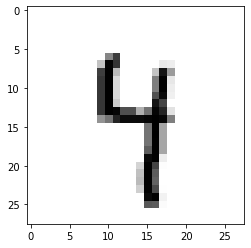

In [21]:
# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in tqdm_notebook(range(training_epochs)):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        # print('Epoch:', '%04d' % (epoch + 1),
        #       '\t cost =', '{:.9f}'.format(avg_cost))
        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

In [22]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
        if i % (total_batch/100) == 0:
            print('▒', end='')
    
    print(' 100% ')
    print('Epoch:', '%04d' % (epoch + 1), end='\t')
    print('Cost =', '{:.9f}'.format(avg_cost))

print()
print("Learning finished")

# Test the model using test sets
# print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0001	Cost = 2.786916230
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0002	Cost = 1.114659648
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0003	Cost = 0.893498639
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0004	Cost = 0.783550556
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0005	Cost = 0.712596882
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0006	Cost = 0.661214466
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0007	Cost = 0.622180100
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0008	Cost = 0.590205638
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0009	Cost = 0.564297977
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0010	Cost = 0.542580001
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0011	Cost = 0.524187736
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

### Report result on test dataset

In [23]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8911


#### Sample image show and prediction
- 랜덤하게 읽어온 이미지를 예측하여 실제 맞는지를 확인한다.

Label:  [6]
Prediction:  [6]


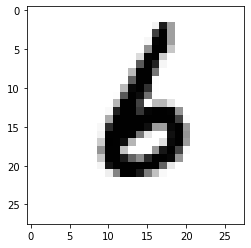

In [24]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [25]:
type(mnist.test.num_examples)

int

In [26]:
mnist.test.num_examples

10000

r: 4497
Label:  [8]
Prediction:  [7]


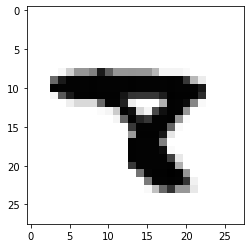

In [27]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("r:", r)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

r: 1710
Label:  [7]
Prediction:  [7]


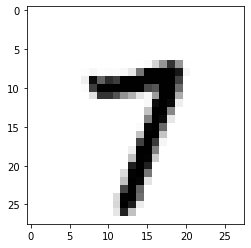

r: 266
Label:  [8]
Prediction:  [8]


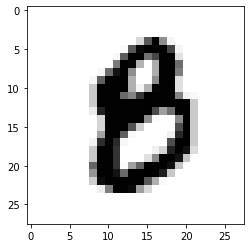

r: 5036
Label:  [1]
Prediction:  [1]


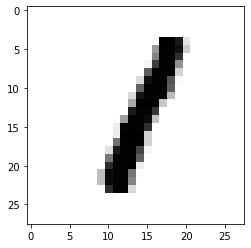

r: 3008
Label:  [9]
Prediction:  [9]


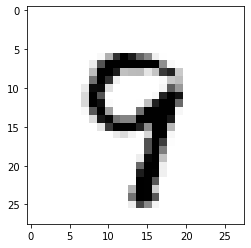

r: 4059
Label:  [5]
Prediction:  [5]


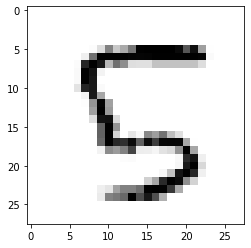

r: 4573
Label:  [2]
Prediction:  [3]


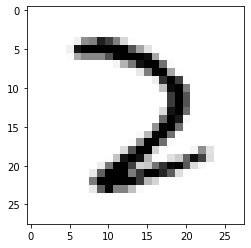

r: 6373
Label:  [4]
Prediction:  [4]


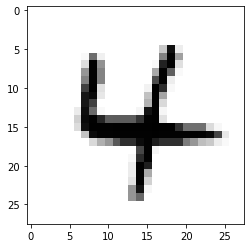

r: 3321
Label:  [5]
Prediction:  [5]


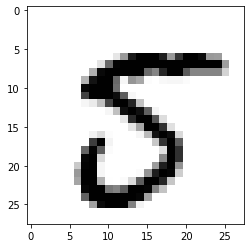

r: 1904
Label:  [9]
Prediction:  [9]


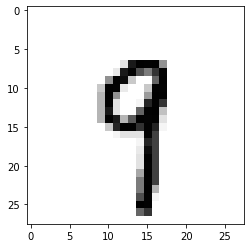

r: 8135
Label:  [8]
Prediction:  [8]


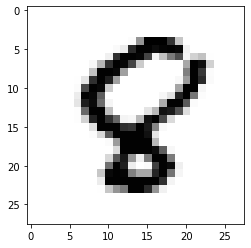

In [28]:
for i in range(10):
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("r:", r)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()